# Flight Price Prediction

Project submitted by:
    Nishtha Virmani (18csu144)


Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Huh! Here we take on the challenge! As data scientists, we are gonna prove that given the right data anything can be predicted. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.    

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
flight_train=pd.read_excel('Data_Train.xlsx')
flight_test=pd.read_excel('Test_set.xlsx')

In [3]:
flight_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


# ABOUT THE DATA

In [4]:
flight_train['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

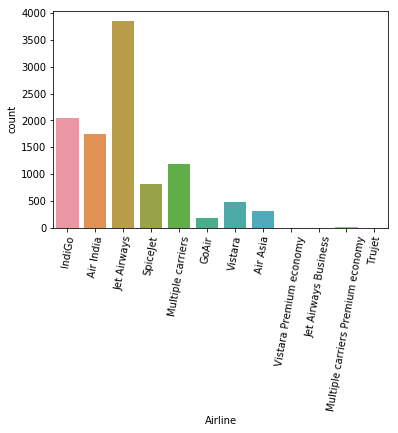

In [5]:
plot=plt.figure()
sns.countplot('Airline',data=flight_train)
plt.xticks(rotation=80)

We can see that we have the maximum flights of Jet Airways in our dataset.

In [6]:
flight_train['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

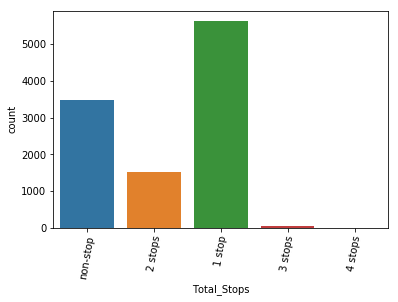

In [7]:
plot=plt.figure()
sns.countplot('Total_Stops',data=flight_train)
plt.xticks(rotation=80)

In [8]:
flight_train['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

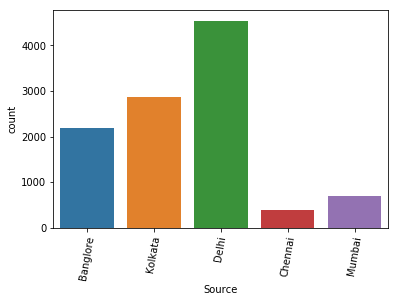

In [9]:
plot=plt.figure()
sns.countplot('Source',data=flight_train)
plt.xticks(rotation=80)

We can conclude that maximum flights are flying from Delhi.

In [10]:
flight_train['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

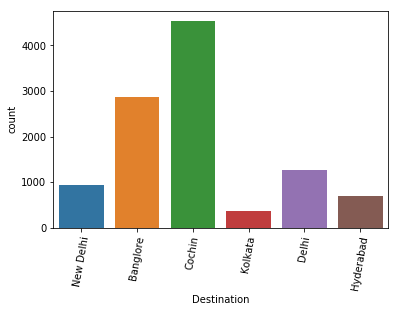

In [11]:
plot=plt.figure()
sns.countplot('Destination',data=flight_train)
plt.xticks(rotation=80)

We can conclude that the maximum flights are going to Cochin.

In [12]:
flight_train['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [13]:
#As we can see that there are two 'no_info' columns we combine them
flight_train['Additional_Info']=flight_train['Additional_Info'].str.replace('No info','No Info')
flight_test['Additional_Info']=flight_test['Additional_Info'].str.replace('No info','No Info')

In [14]:
flight_train['Additional_Info'].value_counts()

No Info                         8348
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

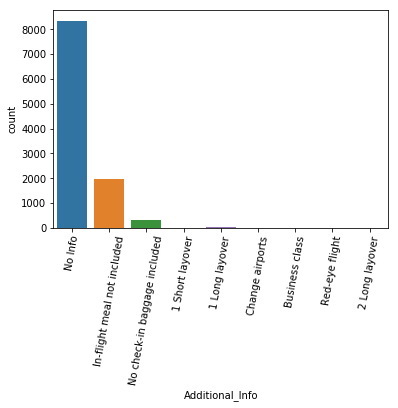

In [15]:
plot=plt.figure()
sns.countplot('Additional_Info',data=flight_train)
plt.xticks(rotation=80)

# Data Cleaning

In [16]:
flight_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
Airline            10683 non-null object
Date_of_Journey    10683 non-null object
Source             10683 non-null object
Destination        10683 non-null object
Route              10682 non-null object
Dep_Time           10683 non-null object
Arrival_Time       10683 non-null object
Duration           10683 non-null object
Total_Stops        10682 non-null object
Additional_Info    10683 non-null object
Price              10683 non-null int64
dtypes: int64(1), object(10)
memory usage: 918.1+ KB


In [17]:
flight_train.isnull().any()

Airline            False
Date_of_Journey    False
Source             False
Destination        False
Route               True
Dep_Time           False
Arrival_Time       False
Duration           False
Total_Stops         True
Additional_Info    False
Price              False
dtype: bool

In [18]:
flight_test.isnull().any()

Airline            False
Date_of_Journey    False
Source             False
Destination        False
Route              False
Dep_Time           False
Arrival_Time       False
Duration           False
Total_Stops        False
Additional_Info    False
dtype: bool

In [19]:
flight_train.loc[flight_train["Total_Stops"].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No Info,7480


In [20]:
#Filling the missing value
flight_train.loc[flight_train["Total_Stops"].isnull(),"Total_Stops"] = "non-stop"

In [21]:
#Checking missing values again
flight_train.isnull().any()

Airline            False
Date_of_Journey    False
Source             False
Destination        False
Route               True
Dep_Time           False
Arrival_Time       False
Duration           False
Total_Stops        False
Additional_Info    False
Price              False
dtype: bool

In [22]:
#Checking missing values in Route
flight_train.loc[flight_train["Route"].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,non-stop,No Info,7480


In [23]:
#Checking what are the values that the Route take
flight_train["Route"].value_counts().head()

DEL → BOM → COK    2376
BLR → DEL          1552
CCU → BOM → BLR     979
CCU → BLR           724
BOM → HYD           621
Name: Route, dtype: int64

In [24]:
#Filling the missing value
flight_train.loc[flight_train["Route"].isnull(),"Route"] = "DEL → COK"

In [25]:
flight_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No Info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No Info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No Info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No Info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No Info,13302


# Visualizations

# 1. Airline wise price variation

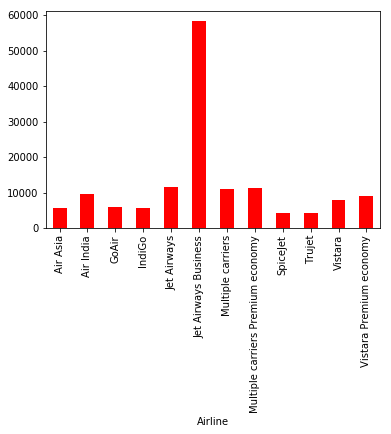

In [26]:
flight_grp = flight_train.groupby('Airline')['Price'].mean()
flight_grp.plot.bar(color='r',width=0.5)

Conclusion: Jet Airways Business has an extremely high price.

# 2.Relation of price with Additional Info

In [27]:
flight_train.groupby('Additional_Info')['Price'].mean()

Additional_Info
1 Long layover                  22109.631579
1 Short layover                 26743.000000
2 Long layover                  26480.000000
Business class                  56811.250000
Change airports                 16800.714286
In-flight meal not included      9471.834511
No Info                          9140.926090
No check-in baggage included     3645.156250
Red-eye flight                  10873.000000
Name: Price, dtype: float64

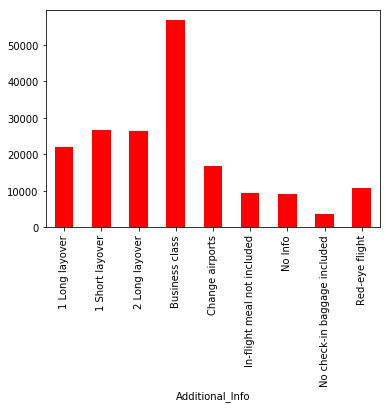

In [28]:
info_grp = flight_train.groupby('Additional_Info')['Price'].mean()
info_grp.plot.bar(color='r',width=0.5)

Conclusion: Business class is costly

# 3.Relation of the Source and Destination with the price

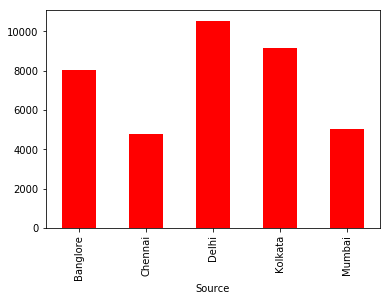

In [29]:
source_grp = flight_train.groupby('Source')["Price"].mean()
source_grp.plot.bar(color='r',width=0.5)

Conclusion: Flights leaving from Delhi and Kolkata have a higher cost 

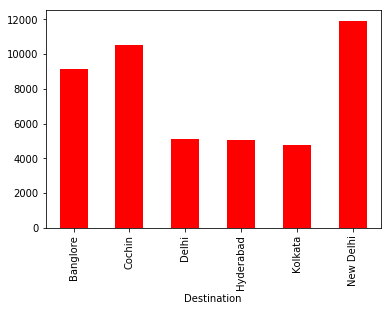

In [30]:
dest_grp = flight_train.groupby('Destination')["Price"].mean()
dest_grp.plot.bar(color='r',width=0.5)

Conclusion: Flights arriving in New delhi and Cochin have a higher cost 

# Data formating

In [31]:
flight_train.drop("Route",axis=1,inplace=True)
flight_test.drop("Route",axis=1,inplace=True)

In [32]:
stops_map = {"non-stop": 0,
             "1 stop": 1,
             "2 stops": 2,
             "3 stops": 3,
             "4 stops": 4}

In [33]:
flight_train["Total_Stops"] = flight_train["Total_Stops"].map(stops_map)
flight_test["Total_Stops"] = flight_test["Total_Stops"].map(stops_map)

In [34]:
flight_train["Total_Stops"].value_counts()

1    5625
0    3492
2    1520
3      45
4       1
Name: Total_Stops, dtype: int64

In [35]:
#splitting the date of journey column

In [36]:
flight_train["Journey_day"]=pd.to_datetime(flight_train.Date_of_Journey,format="%d/%m/%Y").dt.day
flight_test["Journey_day"]=pd.to_datetime(flight_test.Date_of_Journey,format="%d/%m/%Y").dt.day

In [37]:
flight_train["Journey_month"]=pd.to_datetime(flight_train.Date_of_Journey,format="%d/%m/%Y").dt.month
flight_test["Journey_month"]=pd.to_datetime(flight_test.Date_of_Journey,format="%d/%m/%Y").dt.month

In [38]:
#splitting the arrival time column

In [39]:
flight_train['Arrival_Hour']=pd.to_datetime(flight_train['Arrival_Time']).dt.hour
flight_test['Arrival_Hour']=pd.to_datetime(flight_test['Arrival_Time']).dt.hour

In [40]:
flight_train['Arrival_minute']=pd.to_datetime(flight_train['Arrival_Time']).dt.minute
flight_test['Arrival_minute']=pd.to_datetime(flight_test['Arrival_Time']).dt.minute

In [41]:
#splitting the departure time column

In [42]:
flight_train['Dep_Hour']=pd.to_datetime(flight_train['Dep_Time']).dt.hour
flight_test['Dep_Hour']=pd.to_datetime(flight_test['Dep_Time']).dt.hour

In [43]:
flight_train['Dep_Mins']=pd.to_datetime(flight_train['Dep_Time']).dt.minute
flight_test['Dep_Mins']=pd.to_datetime(flight_test['Dep_Time']).dt.minute

In [44]:
#Converting Duration to proper datetime format

In [45]:
#Finding all numbers in a string
import re
duration_nums = flight_train["Duration"].str.findall(r'\d+')
duration_nums_test = flight_test["Duration"].str.findall(r'\d+')

In [46]:
duration_nums.head()

0    [2, 50]
1    [7, 25]
2       [19]
3    [5, 25]
4    [4, 45]
Name: Duration, dtype: object

In [47]:
duration_nums_test.head()

0    [10, 55]
1         [4]
2    [23, 45]
3        [13]
4     [2, 50]
Name: Duration, dtype: object

In [48]:
from datetime import datetime
from datetime import timedelta
for i, duration_list in enumerate(duration_nums.values):
    hours = int(duration_list[0])
    if len(duration_list)==1:
        mins = 0
    else:
        mins = int(duration_list[1])
        
    flight_train.loc[i, "Duration"] = 60*hours + mins

In [49]:
from datetime import datetime
from datetime import timedelta
for i, duration_list in enumerate(duration_nums_test.values):
    hours = int(duration_list[0])
    if len(duration_list)==1:
        mins = 0
    else:
        mins = int(duration_list[1])
        
    flight_test.loc[i, "Duration"] = 60*hours + mins

In [50]:
flight_train.rename(columns={"Duration": "Duration(mins)"}, inplace = True)
flight_test.rename(columns={"Duration": "Duration(mins)"}, inplace = True)

In [51]:
flight_train.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration(mins),Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_Hour,Arrival_minute,Dep_Hour,Dep_Mins
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,170,0,No Info,3897,24,3,1,10,22,20
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,445,2,No Info,7662,1,5,13,15,5,50
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,1140,2,No Info,13882,9,6,4,25,9,25
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,325,1,No Info,6218,12,5,23,30,18,5
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,285,1,No Info,13302,1,3,21,35,16,50


# 4. Relation of the duration of flight with the price

In [52]:
#no. of bins
flight_train["Duration(mins)"].values.max()


2860

In [53]:
flight_train["Duration(mins)"].values.min()

75

In [54]:
NUM_BINS = (2860 - 75)//300
bins = np.linspace(75,2860,NUM_BINS) #Bins in the interval of 5 hours (300 mins)
hours_df = pd.cut(flight_train['Duration(mins)'], bins)
hours_df.head()

0       (75.0, 423.125]
1     (423.125, 771.25]
2    (1119.375, 1467.5]
3       (75.0, 423.125]
4       (75.0, 423.125]
Name: Duration(mins), dtype: category
Categories (8, interval[float64]): [(75.0, 423.125] < (423.125, 771.25] < (771.25, 1119.375] < (1119.375, 1467.5] < (1467.5, 1815.625] < (1815.625, 2163.75] < (2163.75, 2511.875] < (2511.875, 2860.0]]

In [55]:
flight_train.groupby(hours_df)['Price'].mean()

Duration(mins)
(75.0, 423.125]         6054.689157
(423.125, 771.25]      11134.966219
(771.25, 1119.375]     11035.499331
(1119.375, 1467.5]     12055.007380
(1467.5, 1815.625]     11617.182119
(1815.625, 2163.75]    12496.873563
(2163.75, 2511.875]    12127.000000
(2511.875, 2860.0]     16310.250000
Name: Price, dtype: float64

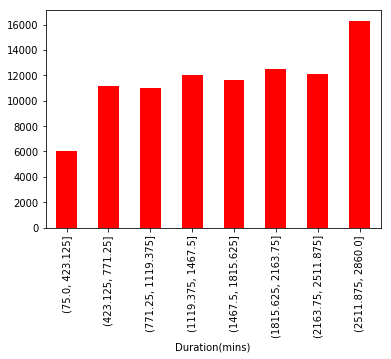

In [56]:
flight_train.groupby(hours_df)['Price'].mean().plot.bar(color='r',width=0.5)

Conclusion: Longer flights have a higher price. Both the price and the duration are correlated with each other.

In [57]:
flight_train[["Duration(mins)", "Price"]].corr()

,Duration(mins),Price
Duration(mins),1.000000,0.506495
Price,0.506495,1.000000


Conclusion: The Duration of flight and the Price have a POSITIVE CORRELATION of 0.5

# Drop the Unwanted columns

In [58]:
flight_train.drop(["Date_of_Journey"],axis=1,inplace=True)
flight_test.drop(["Date_of_Journey"],axis=1,inplace=True)

In [59]:
flight_train.drop('Arrival_Time',axis=1,inplace=True)
flight_test.drop('Arrival_Time',axis=1,inplace=True)

In [60]:
flight_train.head()

,Airline,Source,Destination,Dep_Time,Duration(mins),Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_Hour,Arrival_minute,Dep_Hour,Dep_Mins
0,IndiGo,Banglore,New Delhi,22:20,170,0,No Info,3897,24,3,1,10,22,20
1,Air India,Kolkata,Banglore,05:50,445,2,No Info,7662,1,5,13,15,5,50
2,Jet Airways,Delhi,Cochin,09:25,1140,2,No Info,13882,9,6,4,25,9,25
3,IndiGo,Kolkata,Banglore,18:05,325,1,No Info,6218,12,5,23,30,18,5
4,IndiGo,Banglore,New Delhi,16:50,285,1,No Info,13302,1,3,21,35,16,50


In [61]:
flight_test.head()

,Airline,Source,Destination,Dep_Time,Duration(mins),Total_Stops,Additional_Info,Journey_day,Journey_month,Arrival_Hour,Arrival_minute,Dep_Hour,Dep_Mins
0,Jet Airways,Delhi,Cochin,17:30,655,1,No Info,6,6,4,25,17,30
1,IndiGo,Kolkata,Banglore,06:20,240,1,No Info,12,5,10,20,6,20
2,Jet Airways,Delhi,Cochin,19:15,1425,1,In-flight meal not included,21,5,19,0,19,15
3,Multiple carriers,Delhi,Cochin,08:00,780,1,No Info,21,5,21,0,8,0
4,Air Asia,Banglore,Delhi,23:55,170,0,No Info,24,6,2,45,23,55


# Label encoding

In [62]:
Airline=flight_train[['Airline']]
Airline=pd.get_dummies(Airline,drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [63]:
Airline_test=flight_test[['Airline']]
Airline_test=pd.get_dummies(Airline,drop_first=True)
Airline_test.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [64]:
Source=pd.get_dummies(flight_train.Source,drop_first=True)
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [65]:
Source_test=pd.get_dummies(flight_test.Source,drop_first=True)
Source_test.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,0,0


In [66]:
Destination=pd.get_dummies(flight_train[['Destination']],drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [67]:
Destination_test=pd.get_dummies(flight_test[['Destination']],drop_first=True)
Destination_test.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,0,0,0,0
1,0,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,1,0,0,0


In [68]:
flight_train.drop(['Airline','Source','Destination','Dep_Time','Additional_Info'],axis=1,inplace=True)
flight_test.drop(['Airline','Source','Destination','Dep_Time','Additional_Info'],axis=1,inplace=True)

In [69]:
final_train=pd.concat([flight_train,Airline,Source,Destination],axis=1)
final_test=pd.concat([flight_test,Airline_test,Source_test,Destination_test],axis=1)

In [70]:
pd.set_option('display.max_columns',None)

In [71]:
final_train.shape,final_test.shape

((10683, 29), (10683, 28))

In [72]:
final_train.head()

,Duration(mins),Total_Stops,Price,Journey_day,Journey_month,Arrival_Hour,Arrival_minute,Dep_Hour,Dep_Mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,170,0,3897,24,3,1,10,22,20,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,445,2,7662,1,5,13,15,5,50,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1140,2,13882,9,6,4,25,9,25,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,325,1,6218,12,5,23,30,18,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,285,1,13302,1,3,21,35,16,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [73]:
final_test.head()

,Duration(mins),Total_Stops,Journey_day,Journey_month,Arrival_Hour,Arrival_minute,Dep_Hour,Dep_Mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,655.0,1.0,6.0,6.0,4.0,25.0,17.0,30.0,0,0,1,0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,240.0,1.0,12.0,5.0,10.0,20.0,6.0,20.0,1,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1425.0,1.0,21.0,5.0,19.0,0.0,19.0,15.0,0,0,0,1,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,780.0,1.0,21.0,5.0,21.0,0.0,8.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,170.0,0.0,24.0,6.0,2.0,45.0,23.0,55.0,0,0,1,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# Train test split

In [74]:
y = final_train["Price"]
X = final_train.drop(labels= ['Price'], axis = 'columns')

In [75]:
X.shape, y.shape

((10683, 28), (10683,))

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2)

In [77]:
X_train.shape, y_train.shape

((7478, 28), (7478,))

In [78]:

X_test.shape, y_test.shape

((3205, 28), (3205,))

# Model 1: RandomForestRegression


In [79]:
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor()
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)
from sklearn.metrics import r2_score
rsquare=r2_score(y_test,y_pred)
rsquare

C:\Users\Nishtha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8100862287108201


# Model 2: Linear Regression


In [80]:
from sklearn.linear_model import LinearRegression
lnr = LinearRegression()
lnr.fit(X_train, y_train)
y_pred = lnr.predict(X_test)
rsquare=r2_score(y_test,y_pred)
rsquare

0.6139327283221867

# Model3: Ridge Regression


In [81]:
from sklearn.linear_model import Ridge
rdg = Ridge()
rdg.fit(X_train, y_train)
y_pred = rdg.predict(X_test)
rsquare=r2_score(y_test,y_pred)
rsquare

0.6152502902958026

# Model4: Lasso


In [82]:
from sklearn.linear_model import Lasso
las = Lasso()
las.fit(X_train, y_train)
y_pred = las.predict(X_test)
rsquare=r2_score(y_test,y_pred)
rsquare

0.6142338941218431

# Model 5:Decision Tree Regressor

In [83]:
from sklearn.tree import DecisionTreeRegressor
dtreg = DecisionTreeRegressor()
dtreg.fit(X_train,y_train)
y_pred = dtreg.predict(X_test)
rsquare=r2_score(y_test,y_pred)
rsquare

0.7149137861179304

# Feature Selection

## i) Mutual Informantion Gain

In [84]:
from sklearn.feature_selection import mutual_info_classif
data=mutual_info_classif(X,y)

In [85]:
mutual_info=pd.Series(data,index=X.columns)

In [86]:
mutual_info.sort_values(ascending=False).head()

Duration(mins)        2.377107
Total_Stops           2.161676
Arrival_Hour          1.830463
Destination_Cochin    1.557243
Arrival_minute        1.521213
dtype: float64

In [87]:
mutual_info.nlargest(15)

Duration(mins)               2.377107
Total_Stops                  2.161676
Arrival_Hour                 1.830463
Destination_Cochin           1.557243
Arrival_minute               1.521213
Delhi                        1.497149
Dep_Hour                     1.435452
Journey_month                1.275069
Dep_Mins                     1.214282
Airline_Jet Airways          0.917693
Kolkata                      0.887885
Journey_day                  0.810236
Airline_Air India            0.749821
Airline_IndiGo               0.648855
Airline_Multiple carriers    0.578714
dtype: float64

In [88]:
X_train_1=X_train[['Duration(mins)','Total_Stops','Arrival_Hour','Delhi','Arrival_minute','Destination_Cochin','Dep_Hour','Dep_Mins','Journey_month','Airline_Jet Airways','Kolkata','Journey_day','Airline_Air India','Airline_IndiGo','Airline_Multiple carriers']]
X_test_1=X_test[['Duration(mins)','Total_Stops','Arrival_Hour','Delhi','Arrival_minute','Destination_Cochin','Dep_Hour','Dep_Mins','Journey_month','Airline_Jet Airways','Kolkata','Journey_day','Airline_Air India','Airline_IndiGo','Airline_Multiple carriers']]

In [89]:
#Fitting the RandomForest Regression model on the new data
reg1=RandomForestRegressor()
reg1.fit(X_train_1,y_train)
y_pred=reg1.predict(X_test_1)
rsquare=r2_score(y_test,y_pred)
rsquare


C:\Users\Nishtha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.7905248512955171

In [90]:
#Fitting the linear Regression model on the new data
lnr1=LinearRegression()
lnr1.fit(X_train_1,y_train)
y_pred=lnr1.predict(X_test_1)
rsquare=r2_score(y_test,y_pred)
rsquare

0.5571640257942236

In [91]:
#Fitting the Ridge Regression model on the new data
rdg1= Ridge()
rdg1.fit(X_train_1,y_train)
y_pred=rdg1.predict(X_test_1)
rsquare=r2_score(y_test,y_pred)
rsquare

0.5571836823986344

In [92]:
#Fitting the lasso Regression model on the new data
las1 = Lasso()
las1.fit(X_train_1,y_train)
y_pred=las1.predict(X_test_1)
rsquare=r2_score(y_test,y_pred)
rsquare

0.5571535765399196

In [93]:
#Fitting the Decision Tree Regression model on the new data
dtreg1 = DecisionTreeRegressor()
dtreg1.fit(X_train,y_train)
y_pred = dtreg1.predict(X_test)
rsquare=r2_score(y_test,y_pred)
rsquare

0.7175778466668665

# ii) Chi-Square Method


In [94]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [95]:
order_feature=SelectKBest(score_func=chi2,k=10)

In [96]:
order_rank=order_feature.fit(X_train,y_train)

In [97]:
df_scores=pd.DataFrame(order_rank.scores_,columns=['Score'])
dfcols=pd.DataFrame(X_train.columns)

In [98]:
features_rank=pd.concat([dfcols,df_scores],axis=1)
features_rank.columns=['Features','Score']
features_rank.nlargest(15,'Score')

,Features,Score
0,Duration(mins),2.321447e+06
7,Dep_Mins,5.110486e+04
5,Arrival_minute,3.650152e+04
2,Journey_day,1.649829e+04
4,Arrival_Hour,1.365653e+04
6,Dep_Hour,8.155309e+03
18,Airline_Vistara Premium economy,7.477000e+03
12,Airline_Jet Airways Business,7.473000e+03
14,Airline_Multiple carriers Premium economy,7.468000e+03
17,Airline_Vistara,7.091567e+03


In [99]:
X_train_2=X_train[['Duration(mins)','Dep_Mins','Arrival_minute','Journey_day','Arrival_Hour','Dep_Hour','Airline_Vistara Premium economy','Airline_Jet Airways Business','Airline_Multiple carriers Premium economy','Airline_Vistara','Chennai','Destination_Kolkata','Mumbai','Destination_Hyderabad','Airline_GoAir']]
X_test_2=X_test[['Duration(mins)','Dep_Mins','Arrival_minute','Journey_day','Arrival_Hour','Dep_Hour','Airline_Vistara Premium economy','Airline_Jet Airways Business','Airline_Multiple carriers Premium economy','Airline_Vistara','Chennai','Destination_Kolkata','Mumbai','Destination_Hyderabad','Airline_GoAir']]

In [100]:
#Fitting the RandomForest Regression model on the new data
reg2=RandomForestRegressor()
reg2.fit(X_train_2,y_train)
y_pred=reg2.predict(X_test_2)
rsquare=r2_score(y_test,y_pred)
rsquare

C:\Users\Nishtha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.6195378895202012

In [101]:
#Fitting the linear regression model on the new data
lnr2=LinearRegression()
lnr2.fit(X_train_2,y_train)
y_pred=lnr2.predict(X_test_2)
rsquare=r2_score(y_test,y_pred)
rsquare

0.3662454501021565

In [102]:
#fitting the ridge regression model on the new data
rdg2= Ridge()
rdg2.fit(X_train_2,y_train)
y_pred=rdg2.predict(X_test_2)
rsquare=r2_score(y_test,y_pred)
rsquare

0.3673896185062263

In [103]:
#fitting the lasso regrrssion model on the new data
las2 = Lasso()
las2.fit(X_train_2,y_train)
y_pred=las2.predict(X_test_2)
rsquare=r2_score(y_test,y_pred)
rsquare

0.3668145764399895

In [104]:
#Fitting the Decision Tree Regression model on the new data
dtreg2 = DecisionTreeRegressor()
dtreg2.fit(X_train_2,y_train)
y_pred = dtreg2.predict(X_test_2)
rsquare=r2_score(y_test,y_pred)
rsquare

0.4184714538315695

As we can see that the rsquare values of all our model decreases after applying feature selection. So we can conclude that all the features in our dataset are important and we need to use all of them for getting better results.

We will now try to apply hyper parameter tuning for getting optimal results.

# Hyperparameter optimization

In [105]:
params = { 'bootstrap': [True],
    'max_depth':[int(i) for i in np.linspace(5,30,num=6)],
    'max_features': ['auto','sqrt'],
    'min_samples_leaf': [1,5,7,10],
    'min_samples_split': [4,5,7,10,15,100],
    'n_estimators': [100, 200, 300, 1000, 1500]}



In [107]:
from sklearn.model_selection import GridSearchCV
rf_reg = GridSearchCV(reg,params,cv=5,scoring='neg_mean_squared_error',n_jobs=-1,verbose=3)


In [108]:
from datetime import datetime
start_time = None
rf_reg.fit(X_train,y_train)

Fitting 5 folds for each of 1440 candidates, totalling 7200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   51.4s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed: 18.6min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 25.3min
[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed: 30.4min
[Parallel(n_jobs=-1)]: Done 1560 tasks      | elapsed: 54.2min
[Parallel(n_jobs=-1)]: Done 2040 tasks      | elapsed: 74.1min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed: 92.8min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 121.3min
[Parallel(n_jobs=-1)]: Done 3864 tasks      | elapsed: 147.2min
[Parallel(n_jobs=-1)]: Done 4600 tasks      | elapsed: 175.9min
[Parallel(n_jobs=-1)]: Done 5400 tasks      | elapsed: 218.4min
[Parallel(n_jobs=-1)]: Done 6264 tasks      | elapsed: 256.2min
[Parallel(n_jobs=-1)]: Done 7192 tasks    

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'bootstrap': [True], 'max_depth': [5, 10, 15, 20, 25, 30], 'max_features': ['auto', 'sqrt'], 'min_samples_leaf': [1, 5, 7, 10], 'min_samples_split': [4, 5, 7, 10, 15, 100], 'n_estimators': [100, 200, 300, 1000, 1500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=3)

In [109]:
rf_reg.best_params_

{'bootstrap': True,
 'max_depth': 15,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 7,
 'n_estimators': 100}

In [110]:
rf_reg.best_score_

-4296603.953920006

In [111]:
#applying the hyperparamets on the random forest model
reg_h=RandomForestRegressor(bootstrap = True,
max_depth = 25,
max_features = 'auto',
min_samples_leaf = 1,
min_samples_split = 15,
n_estimators = 100)
reg_h.fit(X_train,y_train)
y_pred=reg_h.predict(X_test)
rsquare=r2_score(y_test,y_pred)
rsquare

0.8480864673934071

Hence, we can see that we are getting optimised results after Hyperparameter tuning.

# Predictions

In [112]:
final_test.fillna(final_train.mean(), inplace=True)

In [113]:
predictions=reg_h.predict(final_test)

In [114]:
prediction = pd.DataFrame(predictions, columns=['predictions']).to_excel('flight_price_pred.xlsx')

# Thank You!